### IST718 - Project - Linear Regression

In [6]:
# Intial Check
import numpy as np
import pandas as pd

In [7]:
# read the file (.csv file) with the help of pandas
refugee = pd.read_csv("UNdata_Export_20161102_000521483.csv")

In [8]:
# rename the columns of the dataframe
refugee.columns = ['Country_Residence','Country_Origin','Year','Refugees','Refugees_UNHCR',\
                   'Total_Refugees', 'Total_Refugess_UNHCR']

In [9]:
# calculate the count of number of transactions with respect to years
refugee_by_year = pd.DataFrame(refugee['Refugees'].groupby(refugee.Year).agg('sum'))
refugee_by_year.index
refugee_by_year.columns = ['Sum']

# extracting values from the series
year = pd.Series(refugee_by_year.index.values)
count = pd.Series(refugee_by_year.Sum.values)

In [10]:
refugee_df = pd.DataFrame(year, columns=['year'])
refugee_df['Sum'] = count

In [11]:
# checking the dataframe with the help of head() function in pandas
refugee_df.head()

,year,Sum
0,1975.0,3529434.0
1,1976.0,4270631.0
2,1977.0,4518659.0
3,1978.0,5065844.0
4,1979.0,6279912.0


In [12]:
# import the matplotlib for plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

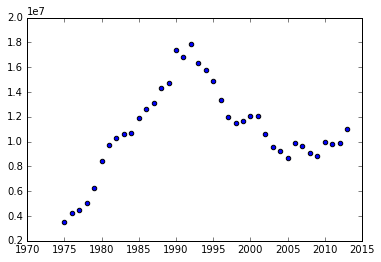

In [13]:
# plot
mpl.pyplot.scatter(refugee_df['year'], refugee_df['Sum'])

In [14]:
# countries with most number of outboud refugees
refugee.head()

,Country_Residence,Country_Origin,Year,Refugees,Refugees_UNHCR,Total_Refugees,Total_Refugess_UNHCR
0,Afghanistan,Iraq,2013.0,1.0,1.0,1.0,1.0
1,Afghanistan,Islamic Rep. of Iran,2013.0,36.0,36.0,36.0,36.0
2,Afghanistan,Pakistan,2013.0,34.0,34.0,16825.0,16825.0
3,Afghanistan,State of Palestine,2013.0,1.0,1.0,1.0,1.0
4,Albania,Algeria,2013.0,0.0,0.0,0.0,0.0


In [24]:
## count
refugee['Year'].value_counts()

2013.0    5271
2012.0    5136
2010.0    4888
2011.0    4799
2009.0    4791
2008.0    4505
2007.0    4380
2006.0    4136
2005.0    4043
2004.0    3991
2003.0    3820
2002.0    3657
2001.0    3382
2000.0    3205
1998.0    2900
1997.0    2509
1999.0    2391
1996.0    2105
1995.0    1801
1994.0    1682
1993.0    1438
1992.0     782
1991.0     652
1990.0     579
1989.0     458
1988.0     387
1985.0     309
1986.0     288
1987.0     286
1984.0     274
1983.0     263
1982.0     259
1981.0     213
1980.0     202
1979.0     159
1978.0     149
1977.0     127
1975.0     108
1976.0     103
Name: Year, dtype: int64

In [15]:
# creating a subset of the dataframe related to country "somalia"
somalia_df = refugee.loc[refugee['Country_Origin'] == "Somalia"]

In [16]:
# check the header of the somalia dataframe
somalia_df.head()

,Country_Residence,Country_Origin,Year,Refugees,Refugees_UNHCR,Total_Refugees,Total_Refugess_UNHCR
32,Algeria,Somalia,2013.0,4.0,4.0,4.0,4.0
54,Angola,Somalia,2013.0,215.0,30.0,215.0,30.0
123,Argentina,Somalia,2013.0,5.0,0.0,5.0,0.0
246,Australia,Somalia,2013.0,67.0,0.0,67.0,0.0
355,Austria,Somalia,2013.0,2278.0,0.0,2278.0,0.0


In [17]:
# total count
Sudan = 13123711
Syria = 3439170

In [18]:
# import the matplotlib for plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [19]:
# dataframe related to number of occurences of the refugee immigration
year_ref_df = pd.DataFrame(refugee['Year'].value_counts()) #value counts
year_ref_df.columns = ['Count']                            # renaming the column
year = pd.Series(year_ref_df.index.values)                 # series for year
count = pd.Series(year_ref_df.Count.values)                # series for count

In [20]:
# final dataframe with counts of each year
year_ref_df = pd.DataFrame(year, columns=['Year'])
year_ref_df['Count'] = count

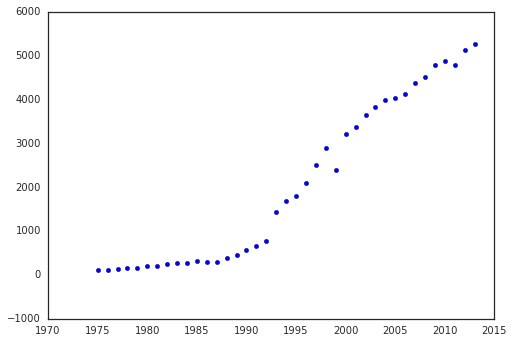

In [68]:
# plot the graph
plot1 = mpl.pyplot.scatter(year_ref_df['Year'],year_ref_df['Count'])

In [75]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

In [76]:
#pdf.savefig('ABC.pdf')


#pp = PdfPages('abc.pdf')
plot1.savefig('abc.pdf')

AttributeError: 'PathCollection' object has no attribute 'savefig'

### Linear Regression

In [21]:
# import the required library for Linear Regression

from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression()

In [22]:
# fit the model
linear_regression_model.fit(year_ref_df[['Year']], year_ref_df[['Count']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
# examine the intercept of the model
linear_regression_model.intercept_

array([-311878.10877193])

In [24]:
# examine the coefficient of the model
linear_regression_model.coef_

array([[ 157.44251012]])

In [25]:
# Predict the data with the help of model created above i.e. linear_regression_model
yhat = linear_regression_model.predict(year_ref_df[['Year']])

In [26]:
# calculating the root mean square error
# help of mean() function
((yhat-year_ref_df[['Count']])**2).mean()

Count    246830.361763
dtype: float64

#### Assesing Model Accuracy - Train and Test

In [27]:
# import the seaborn package
import seaborn as sns
sns.set_style("white")

In [28]:
# Let's split the training data into two components i.e. train and split
from sklearn.cross_validation import train_test_split

In [29]:
# decide on the split ratio
# 70-30 split
Year_train, Year_test, Count_train, Count_test = train_test_split(year_ref_df[['Year']],\
                                    year_ref_df[['Count']], test_size = 0.3, random_state = 0)

##### Model Fit

In [30]:
# fit the data with the help of LinearRegresion().fit() function
model_refugee = LinearRegression().fit(Year_train, Count_train) # fit

In [31]:
# Compute the MSE
model_refugee_train_err = ((model_refugee.predict(Year_train) - Count_train)**2).mean()[0]

In [32]:
# Training error
model_refugee_train_err

236445.38135783287

In [33]:
# Test the model
model_refugee_test_err = ((model_refugee.predict(Year_test) - Count_test)**2).mean()[0]

In [34]:
# Testing error
model_refugee_test_err

294595.27238169097

In [35]:
# Prediction for year 2014
model_refugee.predict(2014)

array([[ 5179.73095774]])

In [36]:
# Prediction for year 2015
model_refugee.predict(2015)

array([[ 5332.26650522]])

In [37]:
# Prediction for year 2016
model_refugee.predict(2016)

array([[ 5484.8020527]])